In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import os
import glob

In [27]:
def get_merged_df(d):
    path = os.path.join('./gtrends', d, '*.csv')
    files = glob.glob(path)
    frames = list()
    for f in files:
        frames.append(pd.read_csv(f, header=0))
    merged = reduce(lambda x,y: pd.merge(x,y, on='Date'), frames)
    return merged

In [41]:
def save_df(df, d):
    path = os.path.join('./gtrends/merged', d + '.csv')
    df.to_csv(path, index=False)

In [51]:
def load_data(d):
    # First check if we already have the data from some other session.
    filename = os.path.join('./gtrends/merged', d + '.csv')
    result = pd.DataFrame()
    if os.path.isfile(filename):
        result = pd.read_csv(filename, header=0)
    else:
        result = get_merged_df(d)
        save_df(result, d)
    return result

In [146]:
def get_timeseries_median(d):
    df = load_data(d)
    x = list()
    y = list()
    for row in df.iterrows():
        _, data = row
        x.append(data['Date'])
        series = pd.Series(data[df.columns[1:]].tolist())
        y.append(series.median())

    return x, y

In [147]:
def get_timeseries_mean(d):
    df = load_data(d)
    x = list()
    y = list()
    for row in df.iterrows():
        _, data = row
        x.append(data['Date'])
        series = pd.Series(data[df.columns[1:]].tolist())
        y.append(series.mean())

    return x, y

In [153]:
def get_timeseries_topk_mean(d, k):
    df = load_data(d)
    x = list()
    y = list()
    for row in df.iterrows():
        _, data = row
        x.append(data['Date'])
        series = pd.Series(data[df.columns[1:]].tolist())
        y.append(series.nlargest(k).mean())

    return x, y

In [155]:
def draw_graph(x, y):
    # Change the strings to be proper date value
    x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in x]

    # Need a bigger figure
    plt.figure(figsize=(10,8))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(x,y)
    plt.gcf().autofmt_xdate()

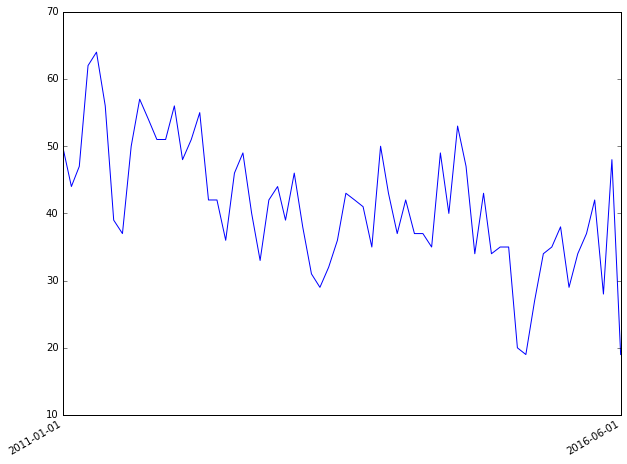

In [156]:
%matplotlib inline
x, y = get_timeseries_median('anonymous web proxy')
draw_graph(x, y)

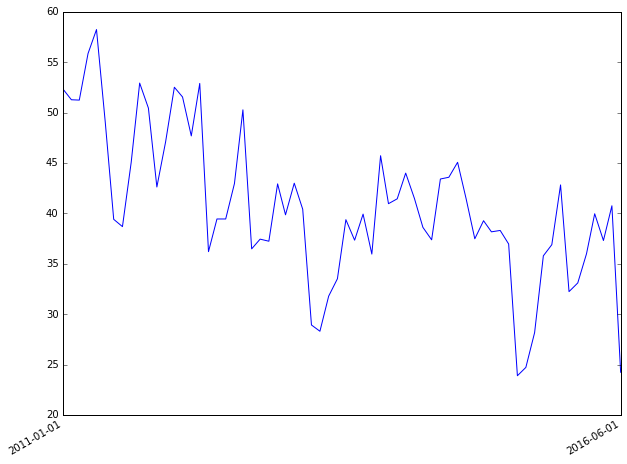

In [157]:
%matplotlib inline
x, y = get_timeseries_mean('anonymous web proxy')
draw_graph(x, y)

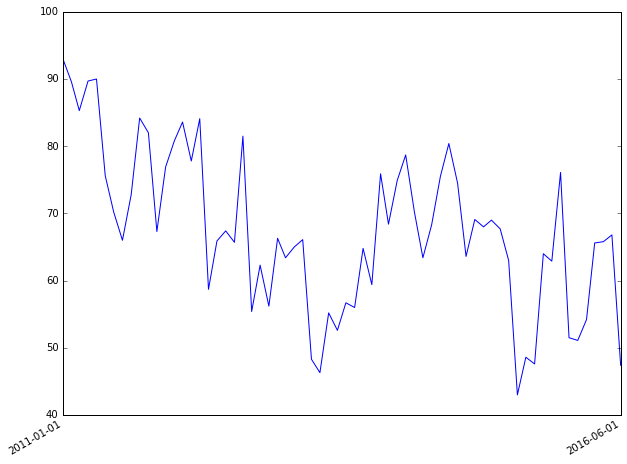

In [158]:
%matplotlib inline
x, y = get_timeseries_topk_mean('anonymous web proxy', 10)
draw_graph(x, y)